# The London Railway Network

The cell below defines the abstract class whose API you will need to impement. Do NOT modify it.

In [374]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractLondonRailwayMapper(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # data initialisation
    @abstractmethod
    def loadStationsAndLines(self):
        pass

    # returns the minimum number of stops to connect station "fromS" to station  "toS"
    # fromS : str
    # toS : str
    # numStops : int
    @abstractmethod
    def minStops(self, fromS, toS):     
        numStops = -1
        return numStops    
    
    # returns the minimum distance in miles to connect station "fromS" to station  "toS"
    # fromS : str
    # toS : str
    # minDistance : float
    @abstractmethod
    def minDistance(self, fromS, toS):
        minDistance = -1.0
        return minDistance
    
    # given an unordered list of station names, returns a new railway line 
    # (represented as a list of adjacent station names), connecting all such stations 
    # and such that the sum of the distances (in miles) between adjacent stations is minimised
    # inputList : set<str>
    # outputList : list<str>
    @abstractmethod
    def newRailwayLine(self, inputList):
        outputList = []
        return outputList

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [375]:
# Queue

'''
To implement a 
'''

class QueueNode:
    def __init__(self, data = None):
        self.data = data
        self.next = None
        self.prev = None

class MyQueue:

    def __init__(self):
        self.size = 0
        self.head = None
        self.tail = None

    def enqueue(self, data):
        node = QueueNode(data)
        if (self.head == None):
            self.head = node
            self.tail = node
        else:
            self.tail.next = node
            node.prev = self.tail
            self.tail = node
        self.size += 1

    def dequeue(self):
        data = self.head.data
        self.head = self.head.next
        self.size -= 1
        if (self.size == 0):
            self.tail = self.head
        return data

    def isEmpty(self):
        return self.size == 0

    def size(self):
        return self.size



In [376]:
# Min-Oriented Priority Queue using Binary Heap

class MinPQ:

    def __init__(self):
        self.size = 0
        self.list = [None]

    def enqueue(self, value, key):
        self.size += 1
        # self.array[self.size] = (value, key)
        self.list.append((value, key))
        self.swim(self.size)

    def swim(self, i):
        while (i > 1 and self.list[i//2][1] > self.list[i][1]):
            self.swap(i, i//2)
            i = i // 2

    def dequeue(self):
        min = self.list[1]
        self.swap(1, self.size)
        self.size -= 1
        self.list.pop()
        self.sink(1)
        return min

    def sink(self, i):
        while (i*2 <= self.size):
            childPos = i*2
            if (childPos < self.size and self.list[childPos][1] > self.list[childPos + 1][1]):
                childPos += 1
            if (self.list[i][1] < self.list[childPos][1]): 
                break
            self.swap(i, childPos)
            i = childPos

    def swap(self, i, j):
        self.list[i], self.list[j] = self.list[j], self.list[i]

    def isEmpty(self):
        return self.size == 0




        


In [377]:
import csv
from math import radians, sin, cos, asin, sqrt
from pandas import * # TODO Remove

# ADD YOUR DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE



class DataLoader:

    '''
    In my DataLoader class I decied to store a pèython dictionary stationsDict containing all the information about stations
    using the following format: {"stationName" : [ keyForGraph, lat, lon ], ...}. The reason behind chosing a dictionary is
    that it allows us to retrieve data in O(1) on average. This will be extremely useful in every situation in which we need
    to access by name information about a station. This occures, for example, when reading the "londonrailwaylines.csv" file
    to load the edges. The worstcase scenario for a dictionary retrival is O(N), where N is the number of stations. However,
    this case is extremely rare, because of the way the hasmap implementing the python default dictionary is structured.  
    '''

    def __init__(self):
        self.stationsDict = {} # Dictionary of tipe {"stationName" : [ keyForGraph, lat, lon ]}
        self.stationsCount = -1
        self.graph = None

    def distance(self, longitude1, latitude1, longitude2, latitude2):
        
        longitude1 = radians(longitude1)
        longitude2 = radians(longitude2)
        latitude1 = radians(latitude1)
        latitude2 = radians(latitude2)

        KmToMiles = 0.621371
        
        # Haversine formula 
        dlon = longitude2 - longitude1 
        dlat = latitude2 - latitude1
        x = sin(dlat / 2)**2 + cos(latitude1) * cos(latitude2) * sin(dlon / 2)**2
        c = 2 * asin(sqrt(x)) 
        radius = 6371
        return(c * radius * KmToMiles)

    def loadFiles(self):

        with open('londonstations.csv') as stationsFile:
            reader = csv.reader(stationsFile, delimiter=',')
            for row in reader:
                if (self.stationsCount == -1):
                    self.stationsCount += 1
                    continue
                self.stationsDict[row[0]] = [self.stationsCount, float(row[1]), float(row[2])]
                self.stationsCount += 1

        self.graph = WeightedGraph(self.stationsCount)

        with open('londonrailwaylines.csv') as linesFile:
            reader = csv.reader(linesFile, delimiter=',')
            lineCount = 0
            for row in reader:
                if (lineCount == 0): 
                    lineCount += 1
                    continue
                lineName = row[0]
                fromStation = row[1]
                toStation = row[2]
                fromStationValue = self.stationsDict.get(fromStation)
                toStationValue = self.stationsDict.get(toStation)

                dist = self.distance(fromStationValue[2], fromStationValue[1], toStationValue[2], toStationValue[1])
                edge = Edge(fromStationValue[0], toStationValue[0], dist, lineName)
                self.graph.addEdge(edge)
                lineCount += 1

        return self.graph, self.stationsDict



class WeightedGraph:

    def __init__(self, V):
        self.V = V
        self.adj = []
        for _ in range (0, V):
            self.adj.append([])

    def addEdge(self, e):
        v = e.endPoint()
        w = e.otherEndPoint(v)
        self.adj[v].append(e)
        self.adj[w].append(e)

    def adjList(self, v):
        return self.adj[v]

    def getVertexCount(self):
        return self.V

    def addDirectedEdge(self, e, v):
        w = e.otherEndPoint(v)
        self.adj[v].append(e)

    def getDegree(self, v):
        return len(self.adj[v])

    def DFSCountReachable(self, v, visited):
        count = 1
        visited[v] = True
        for edge in self.adjList(v):
            w = edge.otherEndPoint(v)
            if visited[w] == False:
                count += self.DFSCountReachable(w, visited)
        return count

    def removeEdge(self, v, w):
        for i in range(len(self.adjList(w))):
            edge = self.adjList(w)[i]
            if v == edge.otherEndPoint(w):
                self.adjList(w).pop(i)
                break
        for i in range(len(self.adjList(v))):
            edge = self.adjList(v)[i]
            if w == edge.otherEndPoint(v):
                self.adjList(v).pop(i)
                break
        return edge
    


class Edge:

    def __init__(self, v, w, weight, lineName):
        self.v = v
        self.w = w
        self.weight = weight
        self.lineName = lineName

    def getLineName(self):
        return self.lineName

    def endPoint(self):
        return self.v

    def otherEndPoint(self, vertex):
        if vertex == self.v: return self.w
        else: return self.v

    def compareTo(self, edge):
        if (self.weight < edge.weight): return -1
        elif (self.weight < edge.weight): return +1
        else: return 0

    def getWeight(self):
        return self.weight


class MinStopsBFS:

    def __init__(self, graph):
        self.graph = graph
        self.distToSource = [-1] * self.graph.getVertexCount()
    
    def minStops(self, start, end):
        queue = MyQueue()    # Implement a queue
        queue.enqueue(start)

        self.distToSource[start] = 0

        while (not queue.isEmpty()):
            v = queue.dequeue()
            for edge in self.graph.adjList(v):
                w = edge.otherEndPoint(v)
                if (self.distToSource[w] == -1):
                    queue.enqueue(w)
                    self.distToSource[w] = self.distToSource[v] + 1
        return self.distToSource[end]

class DijkstraSP:

    def __init__(self, graph, source):
        self.distTo = [float('inf') for v in range(0, graph.getVertexCount())]
        self.distTo[source] = 0
        self.visited = [False for v in range(0, graph.getVertexCount())]
        self.graph = graph

        self.pq = MinPQ()
        self.pq.enqueue(source, 0)


        while (not self.pq.isEmpty()):
            curVertex = self.pq.dequeue()[0]
            if (self.visited[curVertex]): continue
            for edge in self.graph.adjList(curVertex):
                self.relax(edge, curVertex)

            self.visited[curVertex] = True


    def relax(self, edge, fromVertex):
        toVertex = edge.otherEndPoint(fromVertex)
        if (self.distTo[toVertex] > self.distTo[fromVertex] + edge.getWeight()):
            self.distTo[toVertex] = self.distTo[fromVertex] + edge.getWeight()
            self.pq.enqueue(toVertex, self.distTo[toVertex])

    def minDistances(self):
        return self.distTo

class ShortestPath:

    def __init__(self, graph, source):
        self.dijkstra = DijkstraSP(graph, source)

    def findMinDistance(self, destination):
        distTo = self.dijkstra.minDistances()
        return distTo[destination]

    '''
    Prim's Algorithm for MST modified to return a graph instead of a queue of edges. 
    '''


class PrimMST:
    def __init__(self, graph):
        self.marked = [False for vertex in range (0, len(graph[0]))]
        self.mst = WeightedGraph(len(graph[0]))
        self.pq = MinPQ()
        self.visit(graph, 0)
        self.edgesAdded = 0

        while(not self.pq.isEmpty() and self.edgesAdded < (len(graph[0]) - 1)):
            edge = self.pq.dequeue()[0]
            v = edge.endPoint()
            w = edge.otherEndPoint(v)
            if (self.marked[v] and self.marked[w]): continue
            self.mst.addEdge(edge)
            self.edgesAdded += 1
            if (not self.marked[v]): self.visit(graph, v)
            if (not self.marked[w]): self.visit(graph, w)

    def visit(self, graph, v):
        self.marked[v] = True
        for w in range(len(graph[v])):
            if (not self.marked[w]):
                edge = Edge(v, w, graph[v][w], "")
                self.pq.enqueue(edge, graph[v][w])

    def edges(self):
        return self.mst

class NewRailwayConstructorTSP:

    '''
    Since to compute the Salesman Travelling Algorithm I will need the distance between two stations several times, I decided to compute all the distances ones and access them via a matrix. This will avoid calculating the distance N! times, where N is the number of stations in the input, but only N^2 times. This will use some space (the matrix) but it will be relatively small as it only requires N^2 spaces. 
    '''

    def __init__(self, stations, inputList):
        # Construct a weighted graph in matrix format
        self.distance = 0 # TODO Remove
        self.inputList = inputList
        self.stations = stations
        self.graphMatrix = [[] for i in range(len(self.inputList))]
        loader = DataLoader()
        for i in range(0, len(self.inputList)):
            fromStationValue = self.stations.get(self.inputList[i])
            for j in range(0, len(self.inputList)):
                toStationValue = self.stations.get(self.inputList[j])
                dist = loader.distance(fromStationValue[2], fromStationValue[1], toStationValue[2], toStationValue[1])
                self.graphMatrix[i].append(dist)

    '''
    To find the optimal order of stations to build a new line minimizing the distance I used a modified version of the Salesman Travelling Algorithm. The problem is NP-hard and has a cost of O(N!), where N is the number of stations in the input, therefore can only be used with at most roughly 20 stations. My algorithm modifies the Salesman Travelling Algorithm by not precluding a single point as beginning and end. This allows the new railway line to start in any of the stations in the input and does not create a cycle (as we are required to create a straight and non-branching line).
    '''

    def findNewLine(self):
        generator = self.permutations([i for i in range(len(self.inputList))])

        minDist = float('inf')
        minPath = None
        result = []
        for permutation in generator:
            currentDist = 0
            for i in range(len(permutation) - 1):
                currentDist += self.graphMatrix[permutation[i]][permutation[i + 1]]
            if (currentDist < minDist):
                minDist = currentDist
                minPath = permutation

        # Generate result from permutation
        for i in minPath:
            # TODO Remove
            result.append(self.inputList[i]) 
        print(minDist)
        return result



    def permutations(self, elems):
        if len(elems) <= 1:
            yield elems
        else:
            for permutation in self.permutations(elems[1:]):
                for i in range(len(elems)):
                    yield permutation[:i] + elems[0:1] + permutation[i:]





class NewRailwayConstructorChristofides:

    '''
    I decided to implement the Christofides Algorithm because it allows to have a good approximation of the shortest new railway line by having an upper bound of approximation of 1.5*l, where l is the optimal length. This is achieved with time complexity O(N^2 logN), where N is the number of stations in the input, rather than O(N!) for TSP.
    '''

    def __init__(self, stations, inputList):
        self.distance = 0
        self.inputList = inputList
        self.stations = stations

        self.inputVertices = [i for i in range(len(self.inputList))]

        self.graphMatrix = self.buildCompleteGraphMatrix(len(self.inputVertices))

        self.msTree = self.minSpanningTree(self.graphMatrix)
        
        self.oddDegreeVertices = self.findOddDegreeVertices(self.msTree)

        self.minimumPerfMatching()
        self.tour = [0]
        self.findEulerianTour(0)
        self.tour = self.reduceTour()


    def buildCompleteGraphMatrix(self, verticesNum):
        graphMatrix = [[] for i in range(verticesNum)]
        for v in range(0, verticesNum):
            for w in range(0, len(self.inputList)):
                distance = self.euclideanDistance(v, w)
                graphMatrix[v].append(distance)
        return graphMatrix

    def minSpanningTree(self, graph):
        primMST = PrimMST(graph)
        mst = primMST.edges()
        return mst

    def findOddDegreeVertices(self, mst):
        oddDegreeVertices = []
        for v in self.inputVertices:
            if mst.getDegree(v)%2 != 0:
                oddDegreeVertices.append(v)
        return oddDegreeVertices

    def euclideanDistance(self, vertex1, vertex2):
        station1 = self.inputList[vertex1]
        station2 = self.inputList[vertex2]
        station1Value = self.stations.get(station1)
        station2Value = self.stations.get(station2)
        lat1 = station1Value[1]
        lon1 = station1Value[2]
        lat2 = station2Value[1]
        lon2 = station2Value[2]

        dist = sqrt( (lat1 - lat2)**2 + (lon1 - lon2)**2 )
        return dist

    # Simplified version, does not produce the optimal minimum
    # TODO Improve it
    def minimumPerfMatching(self):

        while(self.oddDegreeVertices):
            v = self.oddDegreeVertices.pop()
            minWeight = float('inf')
            closestOddVertex = 0
            for w in self.oddDegreeVertices:
                if(self.graphMatrix[v][w] < minWeight):
                    minWeight = self.graphMatrix[v][w]
                    closestOddVertex = w
            # TODO This operation is inefficient
            self.oddDegreeVertices.remove(closestOddVertex)
            newEdge = Edge(v, closestOddVertex, minWeight, "")
            self.msTree.addEdge(newEdge)

    # We can assume that the updated MST is eulerian because being an MST all edges are connected and all vertices that used to have an odd degree, have now received a new edge during the minimum perfect matching phase.
    def findEulerianTour(self, v):
        
        for edge in self.msTree.adjList(v):
            w = edge.otherEndPoint(v)
            if self.isValidNextEdge(v, w):
                self.tour.append(w)
                edgeDeleted = self.msTree.removeEdge(v, w)
                self.distance += edgeDeleted.getWeight()
                self.findEulerianTour(w)
        

    def isValidNextEdge(self, v, w):
        if len(self.msTree.adjList(v)) == 1:
            return True
        else:
            visited = [False]*(self.msTree.getVertexCount())
            count1 = self.msTree.DFSCountReachable(v, visited)
            deletedEdge = self.msTree.removeEdge(v, w)
            visited =[False]*(self.msTree.getVertexCount())
            count2 = self.msTree.DFSCountReachable(v, visited)
            self.msTree.addEdge(deletedEdge)

            if count1 > count2:
                return False
            else:
                return True

    def reduceTour(self):
        newOptimisedTour = []

        for v in self.tour:
            if v not in newOptimisedTour:
                newOptimisedTour.append(v)
        return newOptimisedTour

    def findNewLine(self):
        result = []
        for i in self.tour:
            result.append(self.inputList[i]) 
        print(self.distance)
        return result




In [378]:
import csv

class LondonRailwayMapper(AbstractLondonRailwayMapper):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.graph = None
        self.stations = None
    
        
    def loadStationsAndLines(self):
        # ADD YOUR CODE HERE
        loader = DataLoader()
        self.graph, self.stations = loader.loadFiles()
    
    

    def minStops(self, fromS, toS):     
        numStops = -1
        # ADD YOUR CODE HERE
        finder = MinStopsBFS(self.graph)
        numStops = finder.minStops(self.stations.get(fromS)[0], self.stations.get(toS)[0])
        
        return numStops    
    
    
    
    def minDistance(self, fromS, toS):
        minDistance = -1.0
        # ADD YOUR CODE HERE
        finder = ShortestPath(self.graph, self.stations.get(fromS)[0])
        minDistance = finder.findMinDistance(self.stations.get(toS)[0])
        
        return minDistance
    
    
    def newRailwayLine(self, inputList):
        outputList = []
        # ADD YOUR CODE HERE
        if (len(inputList) <= 20): #TODO change 2 -> 20
            newrailwayConstructor = NewRailwayConstructorTSP(self.stations, inputList)
            outputList = newrailwayConstructor.findNewLine()
        else:
            newrailwayConstructor = NewRailwayConstructorChristofides(self.stations, inputList)
            outputList = newrailwayConstructor.findNewLine()
        
        return outputList

Use the cell below for all python code needed to test the `LondonRailwayMapper` class above.

16.106662981127617
['East Finchley', 'Dollis Hill', 'Finchley Road and Frognal', 'Great Portland Street', 'Covent Garden', 'Barbican', 'Cambridge Heath', 'Bethnal Green', 'Abbey Road']


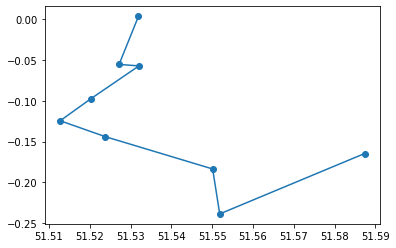

In [379]:
import timeit

# ADD YOUR TEST CODE HERE

mapper = LondonRailwayMapper()
mapper.loadStationsAndLines()
# dict = mapper.stations


# list0 = mapper.newRailwayLine(["Oxford Circus", "Barkingside", "Camden Town", "Shoreditch High Street"])
# list1 = mapper.newRailwayLine(["Oxford Circus", "Barkingside", "Shoreditch High Street", "Camden Town"])
# print(list0) 
# print(list1)
# print(list0 == list1)


# list0 = mapper.newRailwayLine(["Upminster", "Willesden Junction", "Camden Town", "Aldgate", "Chancery Lane", "Charing Cross", "Hither Green"])
# list1 = mapper.newRailwayLine(["Willesden Junction", "Upminster", "Camden Town", "Aldgate", "Chancery Lane", "Charing Cross", "Hither Green"])
# print(list0) 
# print(list1)
# print(list0 == list1)

# list0 = mapper.newRailwayLine(["Homerton", "Green Park", "Covent Garden", "Kilburn High Road", "London City Airport", "Mudchute", "Northumberland Park", "Preston Road", "Upminster"])
# list1 = mapper.newRailwayLine(["Kilburn High Road", "Homerton", "Green Park", "Covent Garden", "London City Airport", "Mudchute", "Northumberland Park", "Preston Road", "Upminster"])
# print(list0) 
# print(list1)
# print(list0 == list1)


# print("Stops:")

# print(stops0, stops1, stops2, stops3, stops4)
# print(dist0, dist1, dist2, dist3, dist4, dist5)

# starttime = timeit.default_timer()
# for i in range(0, 10000):
#     dict.get("Covent Garden")
# endtime = timeit.default_timer()
# print(endtime - starttime)


import matplotlib.pyplot as plt

# inputStations = ["Abbey Road", "Barbican", "Bethnal Green", "Cambridge Heath", "Covent Garden", "Dollis Hill", "East Finchley", "Finchley Road and Frognal", "Great Portland Street", "Hackney Wick", "Isleworth", "Kentish Town West", "Leyton", "Marble Arch", "North Wembley", "Old Street", "Pimlico", "Queens Park", "Richmond", "Shepherds Bush", "Tottenham Hale", "Uxbridge", "Vauxhall", "Wapping"]

inputStations = ["Abbey Road", "Barbican", "Bethnal Green", "Cambridge Heath", "Covent Garden", "Dollis Hill", "East Finchley", "Finchley Road and Frognal", "Great Portland Street"]

inputSet = []

for stat in inputStations:
    lat = mapper.stations.get(stat)[1]
    lon = mapper.stations.get(stat)[2]
    inputSet.append((lat, lon))

outputStations = mapper.newRailwayLine(inputStations)
print(outputStations)

outputSet = []

for stat in outputStations:
    lat = mapper.stations.get(stat)[1]
    lon = mapper.stations.get(stat)[2]
    outputSet.append((lat, lon))

    

plt.figure()

input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

output_xs, output_ys = zip(*outputSet)
plt.plot(output_xs, output_ys)

plt.show()




# list3 = mapper.newRailwayLine(["Abbey Road", "Barbican", "Bethnal Green", "Cambridge Heath", "Covent Garden", "Dollis Hill", "East Finchley", "Finchley Road and Frognal", "Great Portland Street", "Hackney Wick", "Isleworth", "Kentish Town West", "Leyton", "Marble Arch", "North Wembley", "Old Street", "Pimlico", "Queens Park", "Richmond", "Shepherds Bush", "Tottenham Hale", "Uxbridge", "Vauxhall", "Wapping"])
# print("Result: ", list3)
# print(mapper.minStops("Baker Street", "North Wembley"))




The cell below exemplifies the test code I will invoke on your submission. Do NOT modify it. 

In [380]:
# DO NOT MODIFY THIS CELL

import timeit

testMapper = LondonRailwayMapper()

#
# testing the loadStationsAndLines() API 
#
starttime = timeit.default_timer()
testMapper.loadStationsAndLines()
endtime = timeit.default_timer()
print("\nExecution time to load:", round(endtime-starttime,3))

#
# testing the minStops() and minStops() API on a sample of from/to station pairs  
#
fromList = ["Baker Street", "Epping", "Canonbury", "Vauxhall"]
toList = ["North Wembley", "Belsize Park", "Balham", "Leytonstone"]

for i in range(len(fromList)):
    starttime = timeit.default_timer()
    stops = testMapper.minStops(fromList[i], toList[i])
    endtime = timeit.default_timer()
    print("\nExecution time minStops:", round(endtime-starttime,3))

    starttime = timeit.default_timer()
    dist = testMapper.minStops(fromList[i], toList[i])
    endtime = timeit.default_timer()
    print("Execution time minDistance:", round(endtime-starttime,3))

    print("From", fromList[i], "to", toList[i], "in", stops, "stops and", dist, "miles")  
    
#
# testing the newRailwayLine() API on a small list of stations  
#
stationsList = ["Queens Park", "Chigwell", "Moorgate", "Swiss Cottage", "Liverpool Street", "Highgate"]

starttime = timeit.default_timer()
newLine = testMapper.newRailwayLine(stationsList)
endtime = timeit.default_timer()

print("\n\nStation list", stationsList)
print("New station line", newLine)
print("Total track length from", newLine[0], "to", newLine[len(newLine)-1], ":", testMapper.minDistance(newLine[0], newLine[len(newLine)-1]), "miles")
print("Execution time newLine:", round(endtime-starttime,3))

#
# testing the newRailwayLine() API on a big list of stations  
#
stationsList = ["Abbey Road", "Barbican", "Bethnal Green", "Cambridge Heath", "Covent Garden", "Dollis Hill", "East Finchley", "Finchley Road and Frognal", "Great Portland Street", "Hackney Wick", "Isleworth", "Kentish Town West", "Leyton", "Marble Arch", "North Wembley", "Old Street", "Pimlico", "Queens Park", "Richmond", "Shepherds Bush", "Tottenham Hale", "Uxbridge", "Vauxhall", "Wapping"]

starttime = timeit.default_timer()
newLine = testMapper.newRailwayLine(stationsList)
endtime = timeit.default_timer()

print("\n\nStation list", stationsList)
print("New station line", newLine)
print("Total track length from", newLine[0], "to", newLine[len(newLine)-1], ":", testMapper.minDistance(newLine[0], newLine[len(newLine)-1]), "miles")
print("Execution time newLine:", round(endtime-starttime,3))


Execution time to load: 0.013

Execution time minStops: 0.004
Execution time minDistance: 0.003
From Baker Street to North Wembley in 6 stops and 6 miles

Execution time minStops: 0.003
Execution time minDistance: 0.003
From Epping to Belsize Park in 17 stops and 17 miles

Execution time minStops: 0.006
Execution time minDistance: 0.003
From Canonbury to Balham in 10 stops and 10 miles

Execution time minStops: 0.003
Execution time minDistance: 0.003
From Vauxhall to Leytonstone in 6 stops and 6 miles
18.876368213259042


Station list ['Queens Park', 'Chigwell', 'Moorgate', 'Swiss Cottage', 'Liverpool Street', 'Highgate']
New station line ['Chigwell', 'Liverpool Street', 'Moorgate', 'Highgate', 'Swiss Cottage', 'Queens Park']
Total track length from Chigwell to Queens Park : 18.710011238335046 miles
Execution time newLine: 0.002
1.2826866761321936


Station list ['Abbey Road', 'Barbican', 'Bethnal Green', 'Cambridge Heath', 'Covent Garden', 'Dollis Hill', 'East Finchley', 'Finchley Ro